In [109]:
library(ggplot2)
library(ggmap)
library(ggalt)
library(dplyr)

In [2]:
options(warn=-1)

In [4]:
df = read.csv("Melbourne_housing_FULL-26-09-2017.csv")

In [5]:
dim(df)

[1] 23547    21

In [6]:
str(df)

'data.frame':	23547 obs. of  21 variables:
 $ Suburb       : Factor w/ 336 levels "Abbotsford","Aberfeldie",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Address      : Factor w/ 23108 levels "1 Abercrombie St",..: 20002 22084 10427 6622 17071 15745 18380 5650 18185 23076 ...
 $ Rooms        : int  2 2 2 3 3 3 4 4 2 2 ...
 $ Type         : Factor w/ 3 levels "h","t","u": 1 1 1 3 1 1 1 1 1 1 ...
 $ Price        : int  NA 1480000 1035000 NA 1465000 850000 1600000 NA NA NA ...
 $ Method       : Factor w/ 9 levels "PI","PN","S",..: 7 3 3 8 6 1 8 5 3 3 ...
 $ SellerG      : Factor w/ 330 levels "@Realty","Abercromby's",..: 147 30 30 269 30 30 208 208 30 65 ...
 $ Date         : Factor w/ 58 levels "1/07/2017","10/09/2016",..: 44 46 48 48 49 49 50 52 52 52 ...
 $ Distance     : Factor w/ 212 levels "#N/A","0","0.7",..: 82 82 82 82 82 82 82 82 82 82 ...
 $ Postcode     : Factor w/ 207 levels "#N/A","3000",..: 55 55 55 55 55 55 55 55 55 55 ...
 $ Bedroom2     : int  2 2 2 3 3 3 3 3 4 3 ...
 $ Bathroom     : 

In [7]:
df$Date = as.Date(df$Date, format = "%d/%m/%Y")

In [8]:
head(df)

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Abbotsford,68 Studley St,2,h,NA,SS,Jellis,2016-09-03,2.5,3067,⋯,1,1,126,NA,NA,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
Abbotsford,85 Turner St,2,h,1480000,S,Biggin,2016-12-03,2.5,3067,⋯,1,1,202,NA,NA,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,2016-02-04,2.5,3067,⋯,1,0,156,79,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
Abbotsford,18/659 Victoria St,3,u,NA,VB,Rounds,2016-02-04,2.5,3067,⋯,2,1,0,NA,NA,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,2017-03-04,2.5,3067,⋯,2,0,134,150,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
Abbotsford,40 Federation La,3,h,850000,PI,Biggin,2017-03-04,2.5,3067,⋯,2,1,94,NA,NA,Yarra,-37.7969,144.9969,Northern Metropolitan,4019


In [9]:
colSums(is.na(df))

Suburb       Address         Rooms          Type         Price 
            0             0             0             0          5151 
       Method       SellerG          Date      Distance      Postcode 
            0             0             0             0             0 
     Bedroom2      Bathroom           Car      Landsize  BuildingArea 
         4481          4484          4626          6137         13529 
    YearBuilt   CouncilArea     Lattitude    Longtitude    Regionname 
        12007             0          4304          4304             0 
Propertycount 
            0

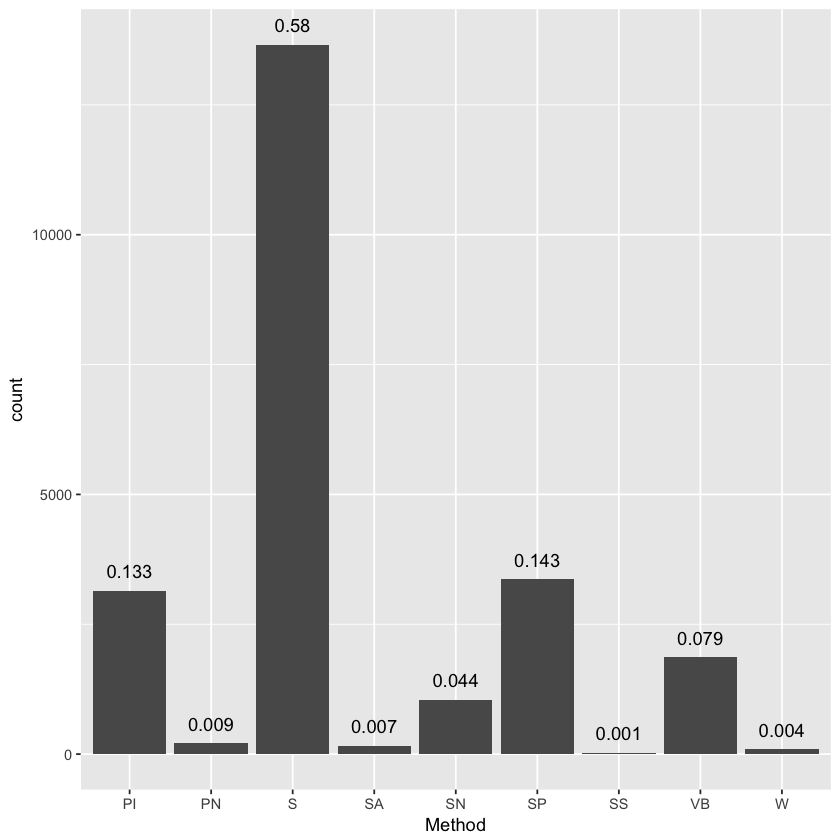

In [10]:
g <- ggplot(df, aes(x = Method,label = Method))
g + geom_bar() + geom_text(stat='count',aes(label=round((..count..)/sum(..count..),3)),vjust=-1)

S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

58% of the houses are sold (S) during the Auction  and another 14.3% prior to the auction(SP). 

13.3% are "Passed in"(PI) meaning not sold.

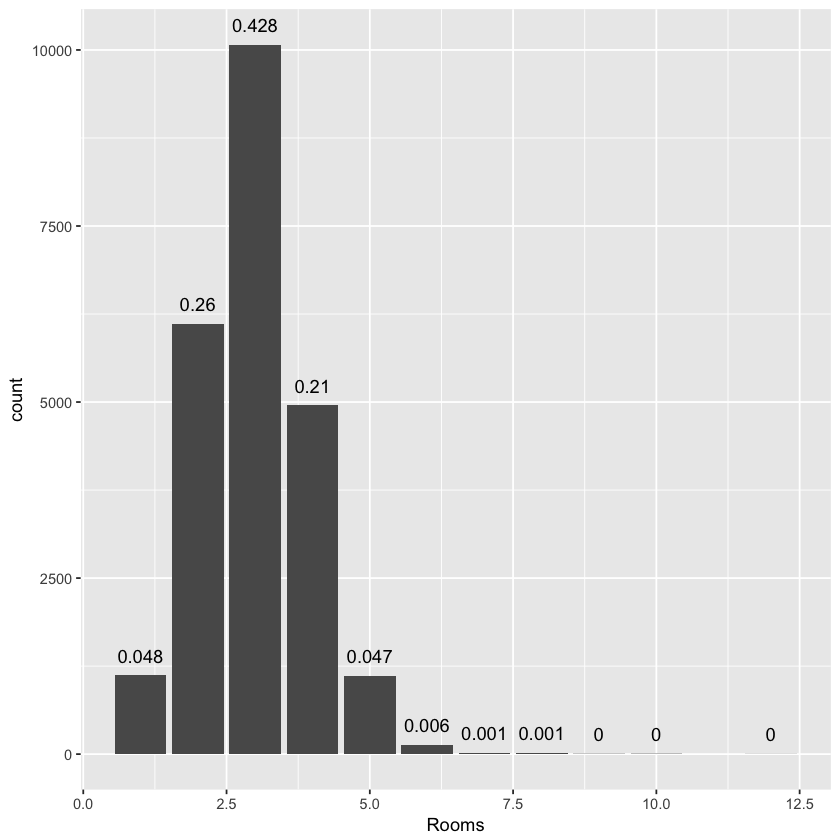

In [11]:
g <- ggplot(df, aes(x = Rooms,label = Method))
g + geom_bar() + geom_text(stat='count',aes(label=round((..count..)/sum(..count..),3)),vjust=-1)

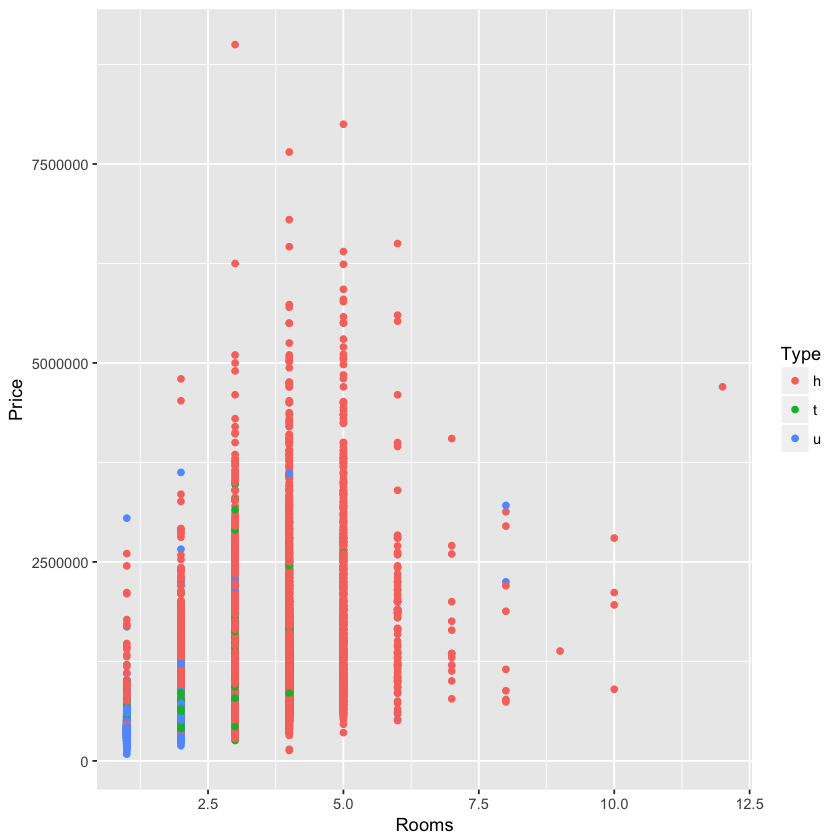

In [12]:
ggplot(df, aes(x = Rooms,y = Price, color=Type)) + geom_point()

In [20]:
melbourne <- geocode('Melbourne',messaging = FALSE)

Source : https://maps.googleapis.com/maps/api/geocode/json?address=Melbourne


In [14]:
melbourne_ggl_sat_map <- qmap('melbourne', zoom = 10, source = 'google', maptype= "roadmap")

Source : https://maps.googleapis.com/maps/api/staticmap?center=melbourne&zoom=10&size=640x640&scale=2&maptype=roadmap&language=en-EN
Source : https://maps.googleapis.com/maps/api/geocode/json?address=melbourne


In [110]:
agg_df <- aggregate(Price ~ Suburb, df, median)

In [111]:
places = df[,c('Longtitude','Lattitude','Suburb')]

In [112]:
places <- places[!duplicated(places$Suburb), ]

In [113]:
places <- merge(x = places, y = agg_df, by = "Suburb", all.x = TRUE)

In [114]:
places1 <- na.omit(places)

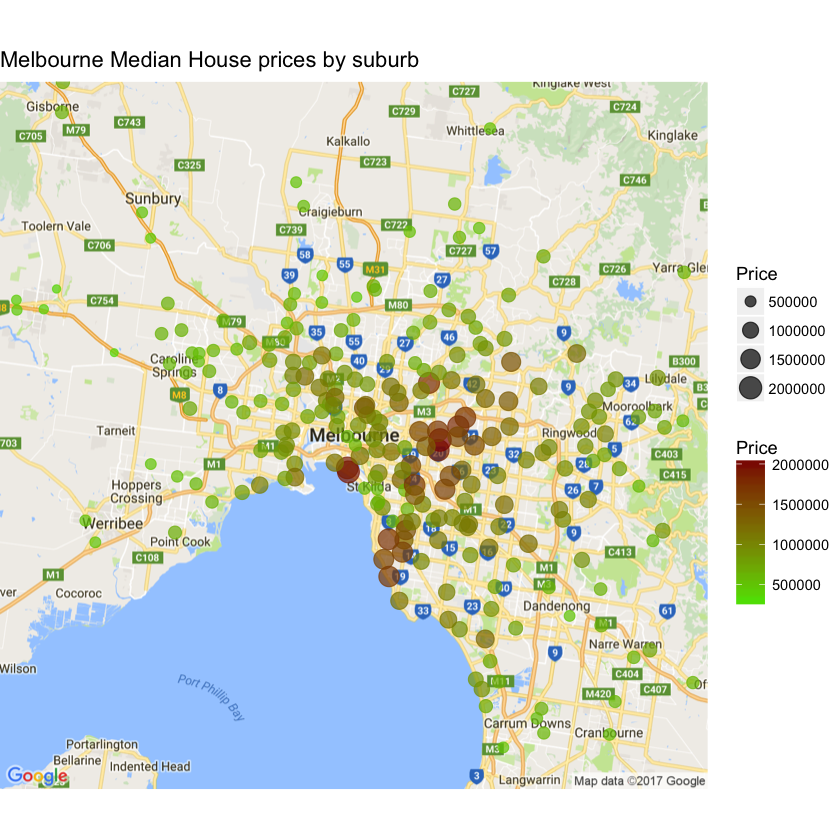

In [115]:
melbourne_ggl_sat_map + geom_point(aes(x=Longtitude,y=Lattitude, size=Price,color=Price),
                                   data = places1,
                                   alpha = 0.7
                                   ) + scale_colour_gradient2(low = "lightgreen", mid = "green", high = "darkred") + ggtitle("Melbourne Median House prices by suburb") 

We can see the expensive houses sold near Albert Park, Kew and Brithton areas

In [116]:
df %>%
  group_by(Suburb) %>%
  top_n(n = 5, wt = Price)

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,2016-05-07,2.5,3067,⋯,2,0,245,210,1910,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
Abbotsford,98 Charles St,2,h,1636000,S,Nelson,2016-10-08,2.5,3067,⋯,1,2,256,107,1890,Yarra,-37.8060,144.9954,Northern Metropolitan,4019
Abbotsford,22 Park St,4,h,1985000,S,Biggin,2016-11-12,2.5,3067,⋯,NA,NA,NA,NA,NA,,-37.8084,144.9942,Northern Metropolitan,4019
Airport West,33 Bowes Av,5,h,1035000,S,Airport,2016-08-06,13.5,3042,⋯,NA,NA,NA,NA,NA,,NA,NA,Western Metropolitan,3464
Airport West,138 Victory Rd,3,h,1042000,S,Nelson,2016-07-16,13.5,3042,⋯,2,5,612,174,1950,Moonee Valley,-37.7173,144.8796,Western Metropolitan,3464
Albert Park,97 Page St,3,h,3010000,S,Greg,2017-03-18,3.3,3206,⋯,2,0,147,146,1890,Port Phillip,-37.8473,144.9551,Southern Metropolitan,3280
Albert Park,115 Page St,4,h,4735000,S,Marshall,2017-02-25,3.3,3206,⋯,2,1,330,207,1910,Port Phillip,-37.8477,144.9558,Southern Metropolitan,3280
Albert Park,22 Greig St,3,h,3755000,S,Greg,2016-07-26,3.3,3206,⋯,2,2,325,NA,NA,Port Phillip,-37.8413,144.9500,Southern Metropolitan,3280
Alphington,83 Fulham Rd,5,h,2840000,S,Nelson,2016-06-12,6.4,3078,⋯,4,4,809,165,1910,Darebin,-37.7750,145.0268,Northern Metropolitan,2211
Alphington,38 Bennett St,4,h,2100000,S,Nelson,2016-11-19,6.4,3078,⋯,2,2,575,271,2008,Darebin,-37.7723,145.0319,Northern Metropolitan,2211


In [117]:
df %>%
  arrange_(~ desc(Price)) %>%
  group_by_(~ Postcode) %>%
  do(head(., n = 1))

Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,⋯,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Footscray Lot,2/16 Stafford St,2,u,710000,S,Jas,2017-07-15,#N/A,#N/A,⋯,NA,NA,NA,NA,NA,,NA,NA,#N/A,#N/A
Melbourne,121/461 St Kilda Rd,2,u,2138000,S,Rodney,2016-06-04,2.8,3000,⋯,NA,NA,NA,NA,NA,,NA,NA,Northern Metropolitan,17496
East Melbourne,110 Vale St,2,h,4525000,S,Caine,2016-12-03,1.5,3002,⋯,2,1,220,279.0,NA,Melbourne,-37.81810,144.9879,Northern Metropolitan,3040
West Melbourne,1/12 Prout La,3,h,2430000,S,Jellis,2017-09-09,3.1,3003,⋯,2,4,NA,NA,NA,,-37.80582,144.9517,Northern Metropolitan,2230
Southbank,6/85 Dodds St,4,u,1250000,S,Kay,2016-11-12,1.2,3006,⋯,3,1,0,176.0,2000,Melbourne,-37.82670,144.9687,Southern Metropolitan,8400
Docklands,202/440 Docklands Dr,4,t,1370000,S,Raine,2016-08-13,1.9,3008,⋯,2,2,0,NA,NA,Melbourne,-37.81410,144.9387,Southern Metropolitan,4707
Seddon,124 Albert St,4,h,1870000,S,Jas,2017-08-12,5.1,3011,⋯,2,2,457,NA,NA,Maribyrnong,-37.80803,144.8960,Western Metropolitan,2417
West Footscray,107 Alma St,3,h,1575000,S,Sweeney,2017-02-25,8.2,3012,⋯,1,4,1000,85.0,1930,Maribyrnong,-37.79360,144.8639,Western Metropolitan,5058
Yarraville,54 Pentland Pde,6,h,2450000,VB,Village,2017-07-29,6.3,3013,⋯,3,2,1087,388.5,1920,Maribyrnong,-37.81038,144.8939,Western Metropolitan,6543
Newport,75 The Strand,4,h,3420000,PI,RT,2016-08-22,8.4,3015,⋯,2,2,757,NA,1886,Hobsons Bay,-37.84900,144.8947,Western Metropolitan,5498


In [118]:
agg_df <- aggregate(Price ~ Suburb, df, mean)

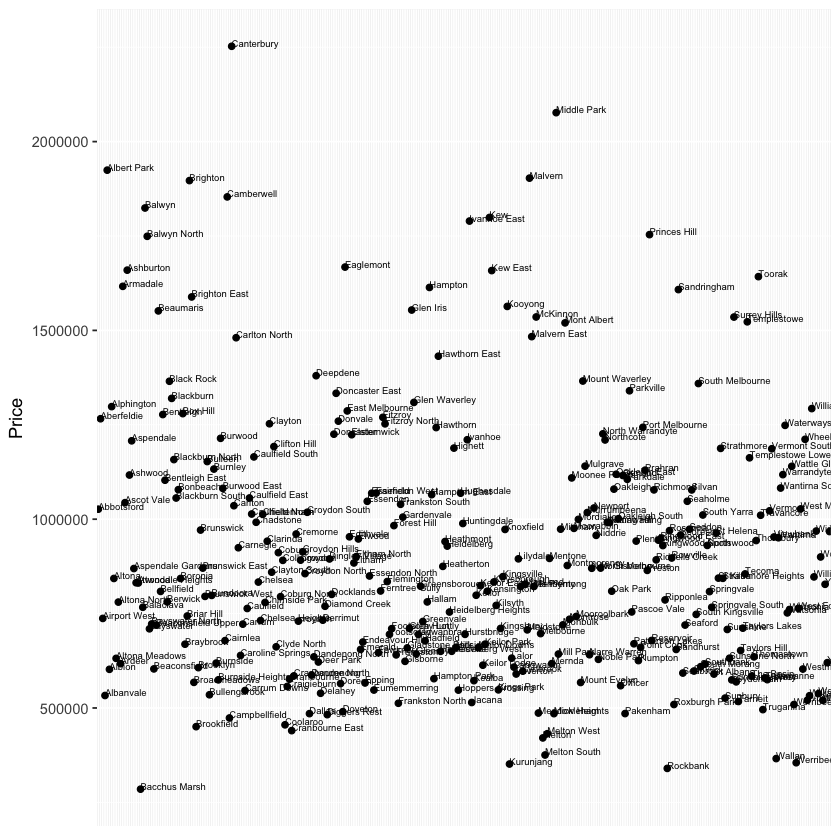

In [119]:
ggplot(agg_df, aes(x=Suburb,y=Price)) +
    geom_point() + 
    geom_text(aes(label=Suburb),hjust=0, vjust=0, size=2) +
    theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
    
)

## 5 of the most expensive suburbs by mean price.

In [120]:
na.omit(df) %>%
  group_by(Suburb)%>%
  summarise(mean_stat = mean(Price)) %>%
  arrange(desc(mean_stat)) %>%
  top_n(n = 5, wt = mean_stat)  

Suburb,mean_stat
Kooyong,3080000
Canterbury,2438135
Middle Park,2295167
Beaumaris,2130400
Malvern,2059875


# 5 of the most expensive suburbs by median price.

This shows us that Kooyong most likely has only 1 house

In [121]:
na.omit(df) %>%
  group_by(Suburb)%>%
  summarise(median_stat = median(Price)) %>%
  arrange(desc(median_stat)) %>%
  top_n(n = 5, wt = median_stat) 

Suburb,median_stat
Kooyong,3080000
Canterbury,2362500
Carlton North,2000000
Malvern,1995000
Middle Park,1965000
